<a href="https://colab.research.google.com/github/cyje66/python_project/blob/main/movie_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
train_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_data1.csv', encoding='latin')

In [ ]:
from sklearn.utils import shuffle

In [ ]:
train_data = shuffle (train_data)

In [ ]:
newdata = pd.DataFrame({"sentiment":train_data.sentiment, "review":train_data.review})
newdata.to_csv("/content/drive/My Drive/Colab Notebooks/人機互動/newdata.csv", index=False)
newdata.head()

In [ ]:
newdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/人機互動/newdata.csv', encoding='latin')
newdata.head()

,sentiment,review
0,0,@posty Oh You work in support too ??!!
1,4,@ewanspence Yay! I am not the only Eurovision ...
2,0,@charlottekane I've tryed but none of it will ...
3,0,"Passing thrugh Bmore, even though I don't wann..."
4,0,Hey babies! I had a loooooong day today so its...


In [ ]:
reviews=newdata['review']
labels=newdata['sentiment']
input_test=newdata['review']
reviews = reviews[:943717]
input_test = input_test[-104858:]
y_test=list()
print(reviews[-5:])
print(input_test[:5])

943712    @rupertg i have!  thy are rubbish!   No sugges...
943713    mark just ate all my chocolate. booooooooooooo...
943714    Summer school is boring already  life just isn...
943715    So im going to sleep alone tonight.  SOMEONE c...
943716    @Susan_BBA I just hope that our &quot;wonderfu...
Name: review, dtype: object
943717    @KristyDaubar well i c ur up early i just want...
943718    @Chesterbear I'm fuckin shattered babe - god o...
943719    watching tori &amp; dean. &amp; drinking a roc...
943720           Back at my mums. Now doing Tech homework. 
943721    this week's not gonna be fun...esp starting it...
Name: review, dtype: object


In [ ]:
print(len(reviews))
print(len(input_test))

943717
104858


In [ ]:
# (0 = negative, 4 = positive)
labels=[1 if label == 4 else 0 for label in labels]  # 0-->negtive, 1-->positive

In [ ]:
labels_test = labels[-104858:]
labels = labels[:943717]

In [ ]:
print(labels[:5])
print(labels[-5:])

[0, 1, 0, 0, 0]
[0, 0, 0, 0, 0]


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [ ]:
from string import punctuation
def review_formatting(reviews):
    all_reviews=list()
    for text in reviews:
        lower_case = text.lower()
        words = lower_case.split()
        reformed = [appos[word] if word in appos else word for word in words]
        reformed_test=list()
        for word in reformed:
            if word not in stop_words:
                reformed_test.append(word)
        reformed = " ".join(reformed_test) 
        punct_text = "".join([ch for ch in reformed if ch not in punctuation])
        all_reviews.append(punct_text)
    all_text = " ".join(all_reviews)
    all_words = all_text.split()
    return all_reviews, all_words

In [ ]:
from collections import Counter 
# Count all the words using Counter Method
all_reviews, all_words=review_formatting(reviews)
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [ ]:
print(vocab_to_int['a'])  # 'a' = 1544

1544


In [ ]:
def encode_reviews(reviews):
    """
    encode_reviews function will encodes review in to array of numbers
    """
    all_reviews=list()
    for text in reviews:
        text = text.lower()
        text = "".join([ch for ch in text if ch not in punctuation])
        all_reviews.append(text)
    encoded_reviews=list()
    for review in all_reviews:
        encoded_review=list()
        for word in review.split():
            if word not in vocab_to_int.keys():
                encoded_review.append(0)
            else:
                encoded_review.append(vocab_to_int[word])
        encoded_reviews.append(encoded_review)
    return encoded_reviews

In [ ]:
def pad_sequences(encoded_reviews, sequence_length=20):
    ''' 
    Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features=np.zeros((len(encoded_reviews), sequence_length), dtype=int)
    
    for i, review in enumerate(encoded_reviews):
        review_len=len(review)
        if (review_len<=sequence_length):
            zeros=list(np.zeros(sequence_length-review_len))
            new=zeros+review
        else:
            new=review[:sequence_length]
        features[i,:]=np.array(new)
    return features

In [ ]:
def preprocess(reviews):
    """
    This Function will tranform reviews in to model readable form
    """
    formated_reviews, all_words = review_formatting(reviews)
    encoded_reviews=encode_reviews(formated_reviews)
    features=pad_sequences(encoded_reviews, 20)
    return features

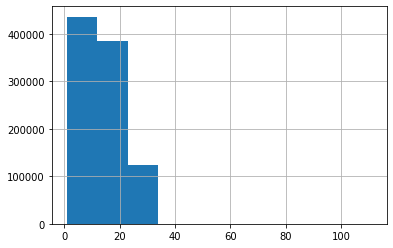

count    943717.000000
mean         13.272228
std           6.971069
min           1.000000
25%           7.000000
50%          12.000000
75%          19.000000
max         111.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
encoded_reviews=encode_reviews(reviews)
review_len=[len(encoded_review) for encoded_review in encoded_reviews]
pd.Series(review_len).hist()
plt.show()
pd.Series(review_len).describe()

In [ ]:
print(labels[-5:])
print(type(labels))
labels = np.array(labels)
labels_test = np.array(labels_test)
print(type(labels))

[0, 0, 0, 0, 0]
<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
features=preprocess(reviews)
train_x=features[:int(0.90*len(features))]
train_y=labels[:int(0.90*len(features))]
#train_x=features
#train_y=labels
valid_x=features[int(0.90*len(features)):]
valid_y=labels[int(0.90*len(features)):]
print(len(train_y), len(valid_y))

849345 94372


In [ ]:
valid_x[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  3975,  2571,   369,  4768,  1213,  5580,
         5580,   381],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,    24,    10,    72,  5163,   225,
        16430,  6954],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,  2695,  9702,   845,
        23816,   428],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,   836,   285,   133,    35,
         2554,   234],
       [    0,     0,     0,     0,     0,   123,   461,  8290,    15,
          225,  2811,  2516,    69,   722,   270,   102,   225,  1391,
          157,   523]])

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data=TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))

#dataloader
batch_size=512
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
valid_loader=DataLoader(valid_data, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)                 # 等價於 for data in dataloader:
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([512, 20])
Sample input: 
 tensor([[     0,      0,      0,  ...,      4,    536,    577],
        [     0,      0,      0,  ...,    107,    649,    176],
        [     0,      0,      0,  ...,    154,    188, 139559],
        ...,
        [     0,      0,    150,  ...,      4,    178,   2995],
        [     0,      0,      0,  ...,     49,    204, 242278],
        [     0,      0,      0,  ...,    145,    102,    211]])

Sample label size:  torch.Size([512])
Sample label: 
 tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0

In [ ]:
import torch.nn as nn

In [ ]:
class SentimentalLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        #dropout layer
        self.dropout=nn.Dropout(0.3)
        #Linear and sigmoid layer
        self.fc1=nn.Linear(hidden_dim, 64)
        self.fc2=nn.Linear(64, 16)
        self.fc3=nn.Linear(16,output_size)
        self.sigmoid=nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size=x.size()
        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)
        #stack up the lstm output
        lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)
        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
        out=self.dropout(out)
        out=self.fc2(out)
        out=self.dropout(out)
        out=self.fc3(out)
        sig_out=self.sigmoid(out)
        sig_out=sig_out.view(batch_size, -1)
        sig_out=sig_out[:, -1]
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(550792, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

In [ ]:
# train for some number of epochs
correct_train = 0
counter = 0
net.train()
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)
    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        h = tuple([each.data for each in h])
        net.zero_grad()
        # get the output from the model
        output, h = net(inputs, h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        # convert output probabilities to predicted class (0 or 1)
        pred = torch.round(output.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        correct_train += np.sum(correct)
        
        
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                inputs, labels = inputs.cuda(), labels.cuda()  
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
            train_acc = correct_train / len(train_loader.dataset)
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Train Acc: {:.2f}%...".format(train_acc*100),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
    correct_train = 0

Epoch: 1/3... Step: 100... Loss: 0.432317... Train Acc: 4.67%... Val Loss: 0.446252
Epoch: 1/3... Step: 200... Loss: 0.447014... Train Acc: 9.55%... Val Loss: 0.416293
Epoch: 1/3... Step: 300... Loss: 0.437001... Train Acc: 14.47%... Val Loss: 0.402344
Epoch: 1/3... Step: 400... Loss: 0.375438... Train Acc: 19.42%... Val Loss: 0.393491
Epoch: 1/3... Step: 500... Loss: 0.430828... Train Acc: 24.38%... Val Loss: 0.388737
Epoch: 1/3... Step: 600... Loss: 0.412552... Train Acc: 29.37%... Val Loss: 0.382603
Epoch: 1/3... Step: 700... Loss: 0.361553... Train Acc: 34.38%... Val Loss: 0.379901
Epoch: 1/3... Step: 800... Loss: 0.315434... Train Acc: 39.39%... Val Loss: 0.376010
Epoch: 1/3... Step: 900... Loss: 0.370120... Train Acc: 44.41%... Val Loss: 0.374574
Epoch: 1/3... Step: 1000... Loss: 0.343544... Train Acc: 49.44%... Val Loss: 0.373263
Epoch: 1/3... Step: 1100... Loss: 0.343581... Train Acc: 54.48%... Val Loss: 0.373230
Epoch: 1/3... Step: 1200... Loss: 0.364545... Train Acc: 59.52%..

In [ ]:
labels_test = np.array(labels_test)
features_test = preprocess(input_test)
test_x = features_test
test_y = labels_test
print(len(test_y))
test_data=TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=True)

104858


In [ ]:
test_y[:30]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)
net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.388
Test accuracy: 0.835


In [ ]:
torch.save(net.state_dict(), "/content/drive/My Drive/Colab Notebooks/人機互動/model_state_dict.pth")

In [ ]:
torch.save(net, "/content/drive/My Drive/Colab Notebooks/人機互動/model.pth")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type SentimentalLSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
call_model = torch.load("/content/drive/My Drive/Colab Notebooks/人機互動/model.pth")
call_model.eval()

SentimentalLSTM(
  (embedding): Embedding(550694, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
import torch

In [ ]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = call_model(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

TypeError: ignored